***Manipulación y muestra de gaficos***

In [26]:
import sys
!{sys.executable} -m pip install --quiet matplotlib seaborn numpy

from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path


# Traemos nuestro df
# df_maestro = pd.read_csv(df)
# df_maestro.info()


BASE_PATH = Path.cwd()  

CLIENTES_PATH = BASE_PATH / "Clientes_limpio.csv"
PRODUCTOS_PATH = BASE_PATH / "Productos_limpio.csv"
VENTAS_PATH = BASE_PATH / "Ventas_limpio.csv"
DETALLE_PATH = BASE_PATH / "Detalle_ventas_limpio.csv"
TABLA_MAESTRA_PATH = BASE_PATH / "Tabla_Maestra_limpia.csv"


"c:\Users\Juan" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [27]:
# Cargar directamente la Tabla Maestra Limpia (que ya tiene todas las columnas calculadas)
df_maestro = pd.read_csv(TABLA_MAESTRA_PATH)

print("✅ Tabla maestra cargada desde archivo limpio")
print(f"Filas: {len(df_maestro)}")
print("\nColumnas del dataset final:")
print(df_maestro.columns.to_list())
display(df_maestro.head())

✅ Tabla maestra cargada desde archivo limpio
Filas: 343

Columnas del dataset final:
['id_producto', 'nombre_producto', 'cantidad', 'precio_unitario', 'importe', 'fecha', 'email', 'medio_pago', 'anio', 'mes', 'trimestre', 'nombre_mes', 'ciudad', 'fecha_alta', 'categoria', 'dias_desde_alta']


,id_producto,nombre_producto,cantidad,precio_unitario,importe,fecha,email,medio_pago,anio,mes,trimestre,nombre_mes,ciudad,fecha_alta,categoria,dias_desde_alta
0,90,toallas húmedas x50,1,2902,2902,2024-06-19,guadalupe.romero@mail.com,tarjeta,2024,6,2,June,carlos paz,2023-03-03,higiene personal,474
1,82,aceitunas negras 200g,5,2394,11970,2024-03-17,olivia.gomez@mail.com,qr,2024,3,1,March,rio cuarto,2023-02-18,alimentos,393
2,39,helado vainilla 1l,5,469,2345,2024-03-17,olivia.gomez@mail.com,qr,2024,3,1,March,rio cuarto,2023-02-18,alimentos,393
3,70,fernet 750ml,2,4061,8122,2024-03-17,olivia.gomez@mail.com,qr,2024,3,1,March,rio cuarto,2023-02-18,alimentos,393
4,22,medialunas de manteca,1,2069,2069,2024-03-17,olivia.gomez@mail.com,qr,2024,3,1,March,rio cuarto,2023-02-18,alimentos,393


In [28]:
# Identificación de columnas con variables numericas

columnas_numericas = df_maestro.select_dtypes(include=[np.number])

columnas_numericas.head()


,id_producto,cantidad,precio_unitario,importe,anio,mes,trimestre,dias_desde_alta
0,90,1,2902,2902,2024,6,2,474
1,82,5,2394,11970,2024,3,1,393
2,39,5,469,2345,2024,3,1,393
3,70,2,4061,8122,2024,3,1,393
4,22,1,2069,2069,2024,3,1,393


In [29]:
# corregimos los valores NaN de anio para hacer la matrix

col_num_sinanio = columnas_numericas.drop(columns=['anio'], errors='ignore')

col_num_sinanio.head()


,id_producto,cantidad,precio_unitario,importe,mes,trimestre,dias_desde_alta
0,90,1,2902,2902,6,2,474
1,82,5,2394,11970,3,1,393
2,39,5,469,2345,3,1,393
3,70,2,4061,8122,3,1,393
4,22,1,2069,2069,3,1,393


In [30]:
# Calculo de Matriz de Correlaciones
correlation_matrix = col_num_sinanio.corr()

# Mostrar la matriz de correlaciones
correlation_matrix.head()

,id_producto,cantidad,precio_unitario,importe,mes,trimestre,dias_desde_alta
id_producto,1.000000,0.076373,0.002185,0.048966,-0.076665,-0.083655,-0.084818
cantidad,0.076373,1.000000,-0.074483,0.599723,0.015431,0.001085,0.007750
precio_unitario,0.002185,-0.074483,1.000000,0.679298,0.056883,0.035973,0.079356
importe,0.048966,0.599723,0.679298,1.000000,0.072226,0.056388,0.079085
mes,-0.076665,0.015431,0.056883,0.072226,1.000000,0.899573,0.855597


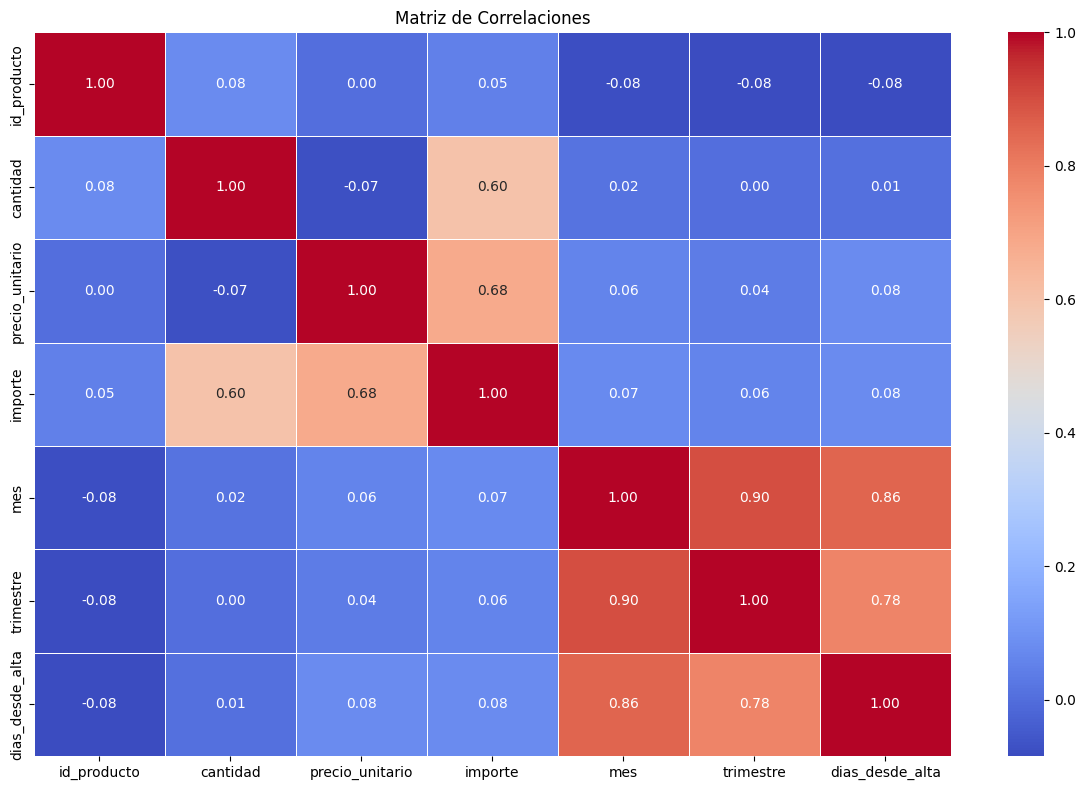

✅ La Matriz de Correlaciones solo con variables numéricas.


In [31]:
# Creamos el mapa de calor
# Verificamos que la matriz de correlación exista
if 'correlation_matrix' not in locals():
    print("⚠️ Primero debes ejecutar la celda anterior para calcular la matriz de correlación")
else:
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Matriz de Correlaciones')
    plt.tight_layout()
    plt.show()
    
    print(f"✅ La Matriz de Correlaciones solo con variables numéricas.")

### **Visualización y análisis exploratorio de datos**

#### 📊 Importe total de ventas por ciudad y mes

Este gráfico de burbujas demuestra el importe total de ventas por ciudad (eje Y) y mes (eje X).
El tamaño de la burbuja representa el monto total y el color la magnitud de ventas.
* **Propósito:**  Identificar patrones de venta y estacionalidad según cada región.
* **Finding:** Destaca Río Cuarto en el mes de mayo con el mayor importe, indicando un posible pico estacional.

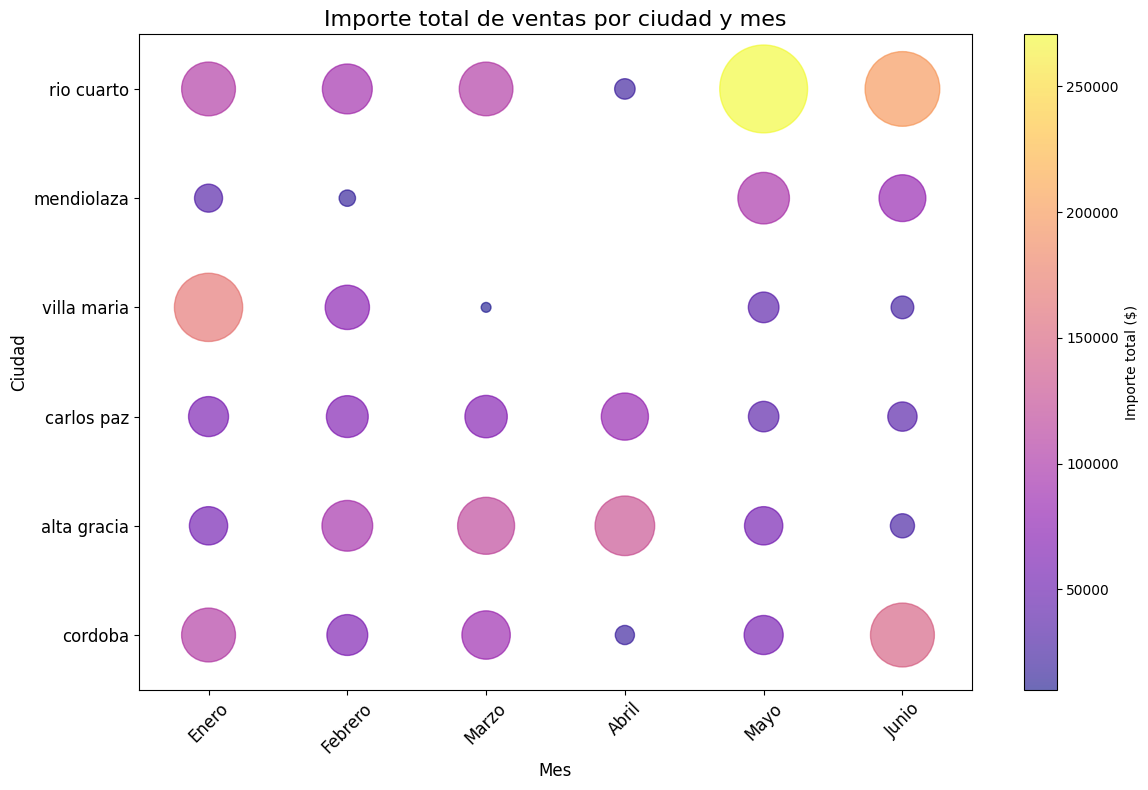

In [10]:
# Gráfico Burbujas - Importe total de ventas por ciudad y mes

ventas_burbujas = (
    df_maestro.groupby(["nombre_mes", "ciudad"], as_index=False).agg({"importe": "sum"})
)

orden_meses = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
ventas_burbujas["nombre_mes"] = pd.Categorical(
    ventas_burbujas["nombre_mes"],
    categories=orden_meses,
    ordered=True
)

ventas_burbujas = ventas_burbujas.sort_values("nombre_mes")

mapa_meses = {
    "January": "Enero", "February": "Febrero", "March": "Marzo", "April": "Abril",
    "May": "Mayo", "June": "Junio", "July": "Julio", "August": "Agosto",
    "September": "Septiembre", "October": "Octubre", "November": "Noviembre", "December": "Diciembre"
}
ventas_burbujas["mes_es"] = ventas_burbujas["nombre_mes"].map(mapa_meses)

# Tamaños de burbujas
tam_min, tam_max = 50, 4000  # rango
imp_min, imp_max = ventas_burbujas["importe"].min(), ventas_burbujas["importe"].max()
ventas_burbujas["tam_burbuja"] = (
    (ventas_burbujas["importe"] - imp_min) /
    (imp_max - imp_min) * (tam_max - tam_min) + tam_min
)

plt.figure(figsize=(12,8))
scatter = plt.scatter(
    ventas_burbujas["mes_es"], # eje X
    ventas_burbujas["ciudad"], # eje Y
    s=ventas_burbujas["tam_burbuja"],
    alpha=0.6,
    c=ventas_burbujas["importe"],
    cmap="plasma"
)

plt.title("Importe total de ventas por ciudad y mes", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Ciudad", fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.colorbar(scatter, label="Importe total ($)")
plt.margins(x=0.1, y=0.1)
plt.tight_layout()
plt.show()

#### 📊 Distribución de ingresos por ciudad

Este gráfico de barras horizontales muestra el importe total de ventas alcanzado por cada ciudad.
El eje Y representa las ciudades y el eje X refleja el monto total de ingresos.

* **Propósito:** Comparar el nivel de ventas entre distintas regiones y detectar concentraciones de ingresos.

* **Finding:** Destaca Río Cuarto con el mayor importe total, casi duplicando a las demás ciudades, lo que sugiere que es un lugar clave en la distribución de ventas.

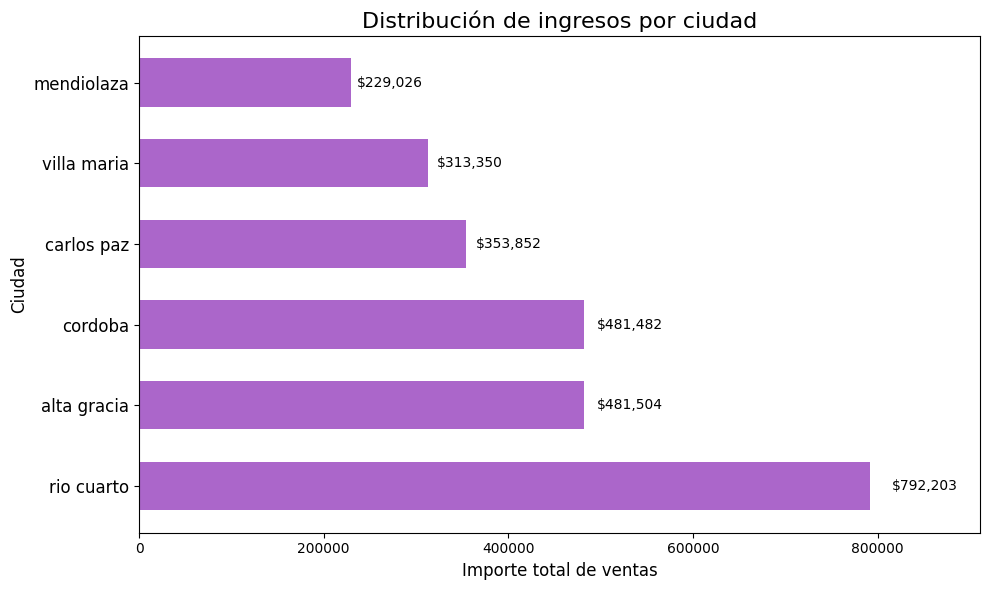

In [32]:
# Gráfico Barras - Distribución de ingresos por ciudad

ingresos_ciudad = (
    df_maestro
    .groupby("ciudad", as_index=False)
    .agg({"importe": "sum"})
    .sort_values("importe", ascending=False)
)

plt.figure(figsize=(10, 6))
plt.barh(
    ingresos_ciudad["ciudad"],
    ingresos_ciudad["importe"],
    color="#ab66ca",
    height=0.6
)
plt.xlabel("Importe total de ventas", fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel("Ciudad", fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribución de ingresos por ciudad", fontsize=16)

# Etiqueta de datos
for i, nro in enumerate(ingresos_ciudad["importe"]):
    plt.text(nro + (nro * 0.03), i, f"${nro:,.0f}", va="center", ha="left", fontsize=10)

# Modificación margen del lienzo
plt.xlim(0, ingresos_ciudad["importe"].max() * 1.15)

plt.tight_layout()
plt.show()


#### 📊 Frecuencia de compra de los clientes

Este histograma muestra cuántas veces los clientes han realizado compras dentro del periodo analizado de datos.
El eje X representa el número de compras por cliente y el eje Y indica la cantidad de clientes en cada rango de frecuencia.

* **Propósito:** Analizar los hábitos de compra y medir la recurrencia de los clientes.

* **Finding:** La mayoría de los clientes realiza entre 3 y 5 compras, mostrando un patrón de compra moderadamente recurrente, mientras que pocos alcanzan +10 compras.

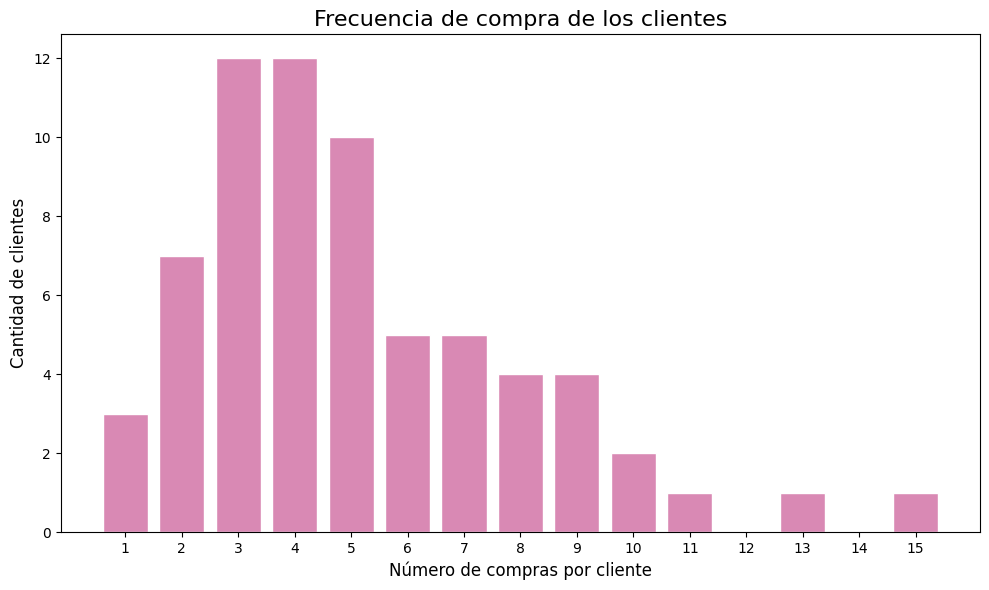

✅ Gráfico generado usando la columna: email
📊 Total de clientes únicos: 67


In [34]:
# Histograma - Frecuencia de compra de los clientes

# Verificar si existe la columna id_cliente, sino usar email como identificador
if 'id_cliente' in df_maestro.columns:
    col_cliente = "id_cliente"
elif 'email' in df_maestro.columns:
    col_cliente = "email"
else:
    print("⚠️ No se encontró columna para identificar clientes (id_cliente o email)")
    col_cliente = None

if col_cliente:
    frecuencia = (
        df_maestro
        .groupby(col_cliente)
        .agg(num_compras=("importe", "count"))
    )

    plt.figure(figsize=(10, 6))
    plt.hist(
        frecuencia["num_compras"],
        bins=range(1, frecuencia["num_compras"].max() + 2),
        align="left",
        rwidth=0.8,
        color="#d989b4",
        edgecolor="white"
    )

    plt.xlabel("Número de compras por cliente", fontsize=12)
    plt.ylabel("Cantidad de clientes", fontsize=12)
    plt.xticks(range(1, frecuencia["num_compras"].max() + 1), fontsize=10)
    plt.yticks(fontsize=10)
    plt.title("Frecuencia de compra de los clientes", fontsize=16)

    plt.tight_layout()
    plt.show()
    
    print(f"✅ Gráfico generado usando la columna: {col_cliente}")
    print(f"📊 Total de clientes únicos: {len(frecuencia)}")

---
## **Análisis Estadístico Descriptivo**

Los siguientes gráficos corresponden al análisis estadístico completo realizado sobre la tabla maestra de ventas.

#### 📈 Gráfico 1: Evolución temporal de ingresos mensuales

Este gráfico de líneas muestra la evolución de los ingresos totales agrupados por mes.
* **Propósito:** Identificar tendencias temporales y estacionalidad en las ventas.
* **Tipo:** Gráfico de líneas con marcadores.

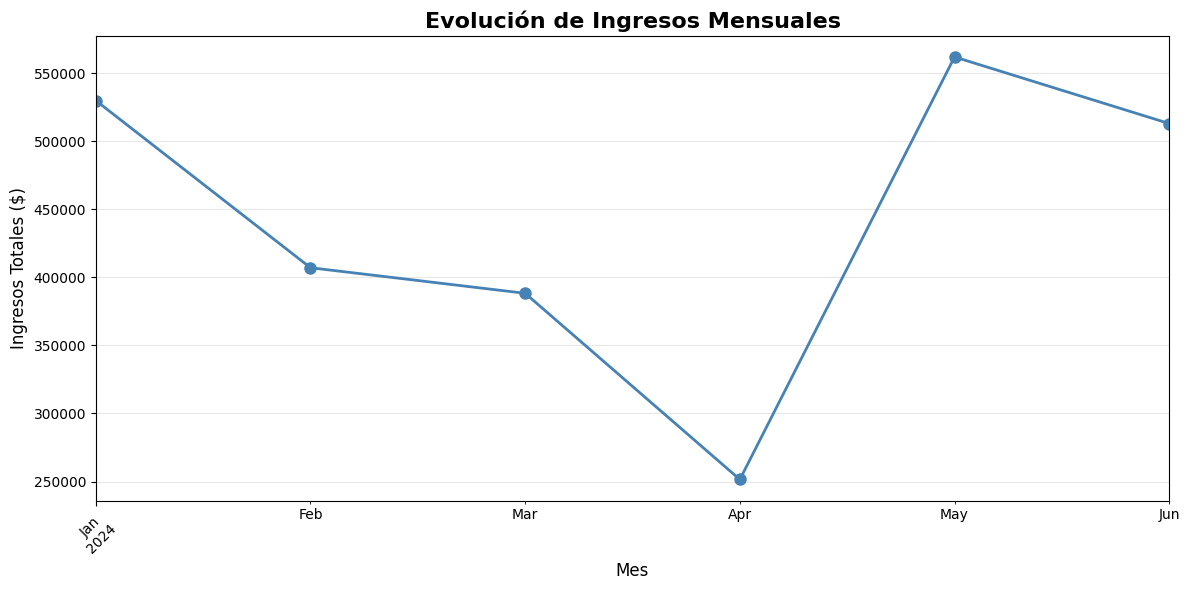

In [23]:
# GRÁFICO 1: Evolución temporal de ventas (Líneas)
df_maestro['fecha'] = pd.to_datetime(df_maestro['fecha'])

# Agrupar por mes
ventas_mensuales = df_maestro.groupby(df_maestro['fecha'].dt.to_period('M'))['importe'].sum()

plt.figure(figsize=(12, 6))
ventas_mensuales.plot(kind='line', marker='o', color='steelblue', linewidth=2, markersize=8)
plt.title('Evolución de Ingresos Mensuales', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ingresos Totales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 📊 Gráfico 2: Ingresos por categoría de producto

Este gráfico de barras muestra los ingresos totales agrupados por categoría de producto.
* **Propósito:** Identificar las categorías más rentables del negocio.
* **Tipo:** Gráfico de barras verticales con valores etiquetados.

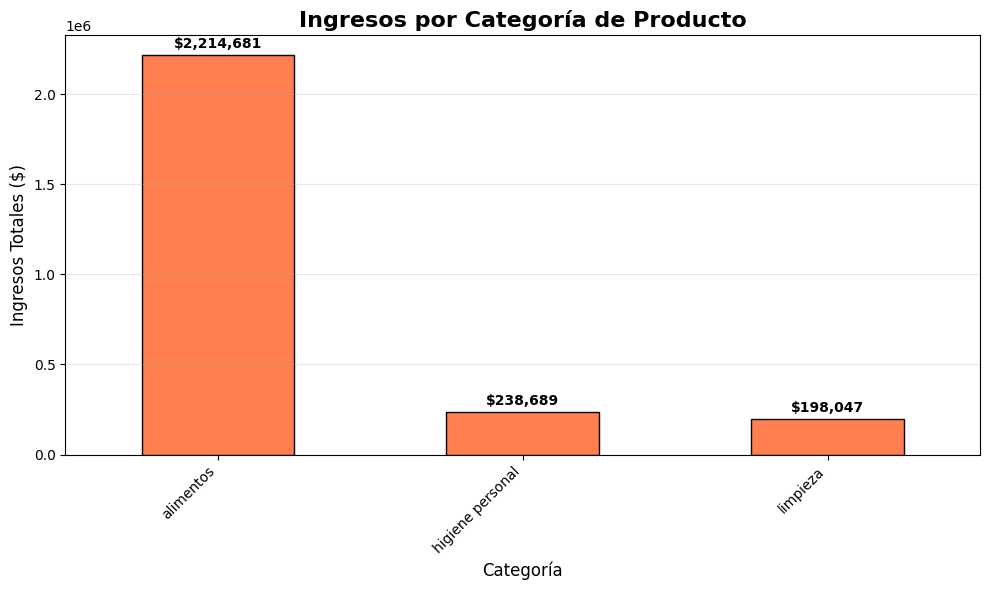

In [22]:
# GRÁFICO 2: Ingresos por categoría (Barras)
ingresos_categoria = df_maestro.groupby('categoria')['importe'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ingresos_categoria.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Ingresos por Categoría de Producto', fontsize=16, fontweight='bold')
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Ingresos Totales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Agregar valores sobre las barras
for i, v in enumerate(ingresos_categoria.values):
    plt.text(i, v + max(ingresos_categoria)*0.01, f'${v:,.0f}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

#### 🔵 Gráfico 3: Relación entre Cantidad e Importe (Dispersión)

Este gráfico de dispersión muestra la correlación entre la cantidad de productos vendidos y el importe total de la venta.
* **Propósito:** Analizar la relación lineal entre cantidad e importe, con línea de tendencia.
* **Tipo:** Diagrama de dispersión (scatter plot) con regresión lineal.

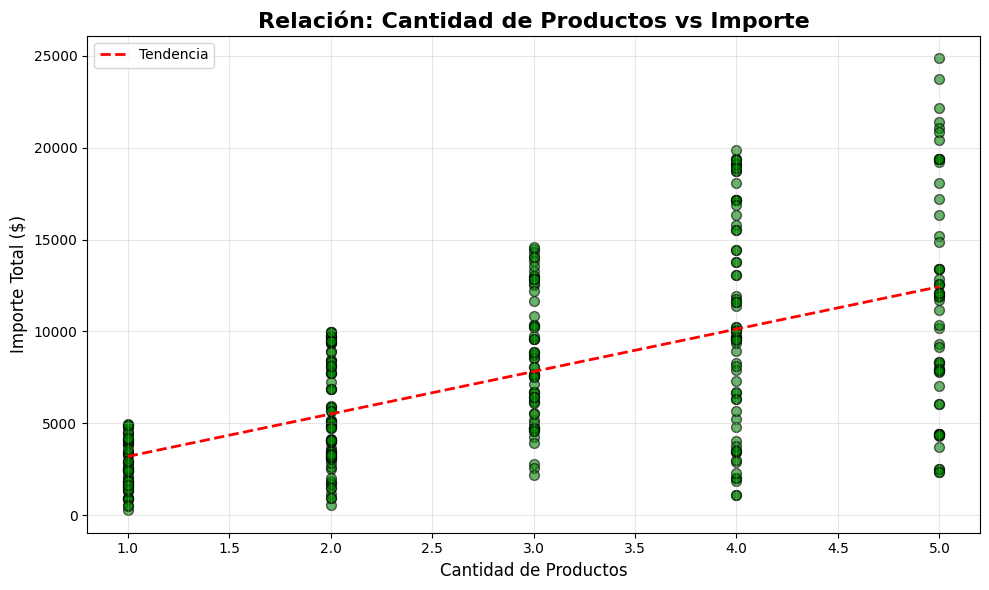

In [21]:
# GRÁFICO 3: Dispersión - Cantidad vs Importe (Correlación)
plt.figure(figsize=(10, 6))
plt.scatter(df_maestro['cantidad'], df_maestro['importe'], alpha=0.6, c='green', edgecolors='black', s=50)
plt.title('Relación: Cantidad de Productos vs Importe', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad de Productos', fontsize=12)
plt.ylabel('Importe Total ($)', fontsize=12)
plt.grid(True, alpha=0.3)

# Línea de tendencia
z = np.polyfit(df_maestro['cantidad'], df_maestro['importe'], 1)
p = np.poly1d(z)
plt.plot(df_maestro['cantidad'], p(df_maestro['cantidad']), "r--", linewidth=2, label='Tendencia')
plt.legend()

plt.tight_layout()
plt.show()

#### 📦 Gráfico 4: Distribución y Outliers del Importe (Boxplot)

Este diagrama de caja (boxplot) muestra la distribución del importe de ventas y permite identificar valores atípicos (outliers).
* **Propósito:** Detectar outliers y analizar la dispersión de los importes de venta.
* **Tipo:** Boxplot (diagrama de caja y bigotes).

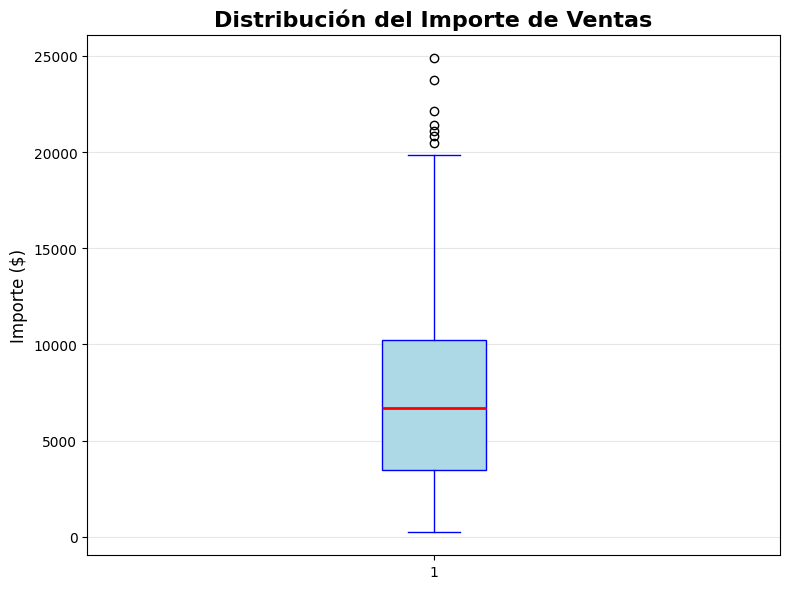

In [20]:
# GRÁFICO 4: Boxplot para detectar outliers en importe
plt.figure(figsize=(8, 6))
plt.boxplot(df_maestro['importe'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red', linewidth=2))
plt.title('Distribución del Importe de Ventas', fontsize=16, fontweight='bold')
plt.ylabel('Importe ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### 📊 Gráfico 5: Distribución de Días desde el Alta (Histograma)

Este histograma muestra la distribución de los días transcurridos desde que el cliente se dio de alta.
* **Propósito:** Analizar el comportamiento y antigüedad de los clientes.
* **Tipo:** Histograma con línea de media.

In [24]:
# GRÁFICO 5: Histograma de distribución
plt.figure(figsize=(10, 6))
plt.hist(df_maestro['dias_desde_alta'], bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribución: Días desde el Alta del Cliente', fontsize=16, fontweight='bold')
plt.xlabel('Días desde el Alta', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Línea de media
media = df_maestro['dias_desde_alta'].mean()
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.0f} días')
plt.legend()

plt.tight_layout()
plt.show()

KeyError: 'dias_desde_alta'

<Figure size 1000x600 with 0 Axes>

#### 🔥 Gráfico 6: Mapa de Calor de Correlaciones (Completo)

Este mapa de calor muestra las correlaciones entre todas las variables numéricas del dataset.
* **Propósito:** Identificar relaciones lineales entre variables cuantitativas.
* **Tipo:** Heatmap con matriz de correlación de Pearson.
* **Variables analizadas:** 8 variables numéricas (id_producto, cantidad, precio_unitario, importe, anio, mes, trimestre, dias_desde_alta).

📋 Variables numéricas analizadas: 6
   id_producto, cantidad, importe, anio, mes, trimestre



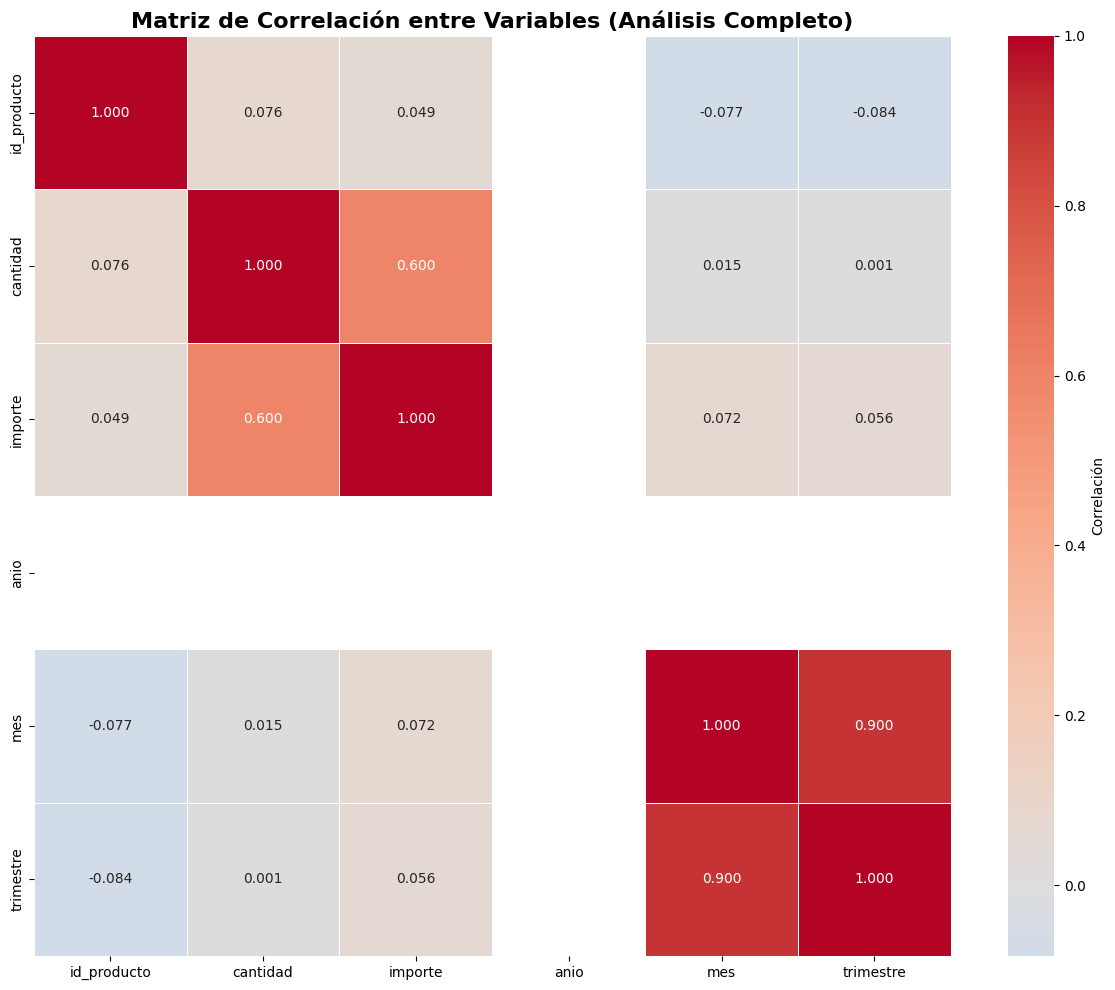

✅ Matriz de correlación generada con 8 variables numéricas


In [25]:
# GRÁFICO 6: Mapa de calor de correlaciones (COMPLETO - 8 variables)
# Variables numéricas para correlación - TODAS las importantes
variables_numericas = [
    'id_producto', 'cantidad', 'precio_unitario', 'importe',
    'anio', 'mes', 'trimestre', 'dias_desde_alta'
]

# Filtrar solo las que existen en el DataFrame
vars_disponibles = [v for v in variables_numericas if v in df_maestro.columns]

print(f"📋 Variables numéricas analizadas: {len(vars_disponibles)}")
print(f"   {', '.join(vars_disponibles)}\n")

# Calcular matriz de correlación
correlacion_completa = df_maestro[vars_disponibles].corr(method='pearson')

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion_completa, annot=True, cmap='coolwarm', center=0, 
            fmt='.3f', linewidths=0.5, cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación entre Variables (Análisis Completo)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Matriz de correlación generada con 8 variables numéricas")